In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import dateutil

In [3]:
sfc=pd.read_csv('sanfrancisco_incidents_summer_2014.csv')

In [4]:
sfc.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,37.780036,"(37.7800356268394, -122.409795194505)",14617792306244
3,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,RICHMOND,NONE,FULTON ST / 26TH AV,-122.485263,37.772518,"(37.7725176473142, -122.485262988324)",14617753106244
4,140734220,NON-CRIMINAL,FOUND PROPERTY,Sunday,08/31/2014,23:23,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.509895,37.772313,"(37.7723131976814, -122.509895418239)",14073422072000


In [5]:
sfc.describe()

,IncidntNum,X,Y,PdId
count,2.899300e+04,28993.000000,28993.000000,2.899300e+04
mean,1.420173e+08,-122.421961,37.768911,1.420173e+13
std,1.853367e+07,0.025313,0.023604,1.853367e+12
min,1.028438e+07,-122.513642,37.708083,1.028439e+12
25%,1.405456e+08,-122.432224,37.756486,1.405456e+13
50%,1.406320e+08,-122.415633,37.775421,1.406320e+13
75%,1.407197e+08,-122.406521,37.785094,1.407197e+13
max,9.903674e+08,-122.365565,37.817315,9.903674e+13


In [6]:
sfc['DateTime']=sfc['Date'].map(str)+' '+sfc['Time'].map(str)
sfc['DateTime'] = sfc['DateTime'].apply(dateutil.parser.parse)
sfc['DayofWeek'] = sfc['DateTime'].dt.dayofweek
sfc['Hour'] = sfc['DateTime'].dt.hour
sfc['cnt']=1

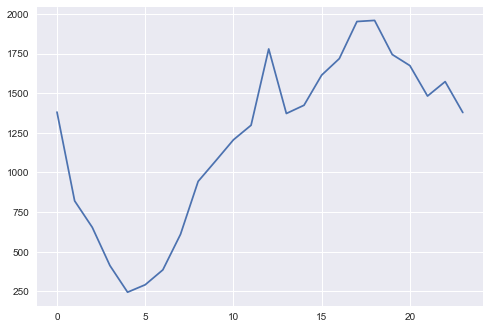

In [13]:
pdata = sfc.groupby(['Hour'],as_index=False)['cnt'].sum() 
plt.plot(pdata['Hour'],pdata['cnt'])
plt.show()

In [19]:
hm_data = sfc.pivot_table(values='cnt', index=['Hour'],columns='Category', aggfunc=sum)
hm_data.head()

Category,ARSON,ASSAULT,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,EXTORTION,...,RUNAWAY,SECONDARY CODES,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
Hour,,,,,,,,,,,,,,,,,,,,,
0,5.0,169.0,NaN,NaN,3.0,9.0,56.0,9.0,NaN,NaN,...,4.0,30.0,NaN,1.0,74.0,8.0,1.0,66.0,62.0,26.0
1,2.0,115.0,1.0,1.0,2.0,17.0,30.0,11.0,NaN,1.0,...,2.0,7.0,3.0,1.0,32.0,7.0,NaN,51.0,49.0,12.0
2,1.0,126.0,NaN,NaN,1.0,8.0,31.0,10.0,NaN,1.0,...,2.0,10.0,NaN,2.0,26.0,12.0,NaN,36.0,36.0,8.0
3,5.0,68.0,NaN,2.0,1.0,5.0,24.0,6.0,NaN,NaN,...,1.0,14.0,NaN,NaN,17.0,9.0,1.0,24.0,23.0,10.0
4,4.0,39.0,NaN,NaN,NaN,3.0,3.0,2.0,NaN,NaN,...,1.0,5.0,NaN,NaN,13.0,5.0,1.0,19.0,17.0,6.0


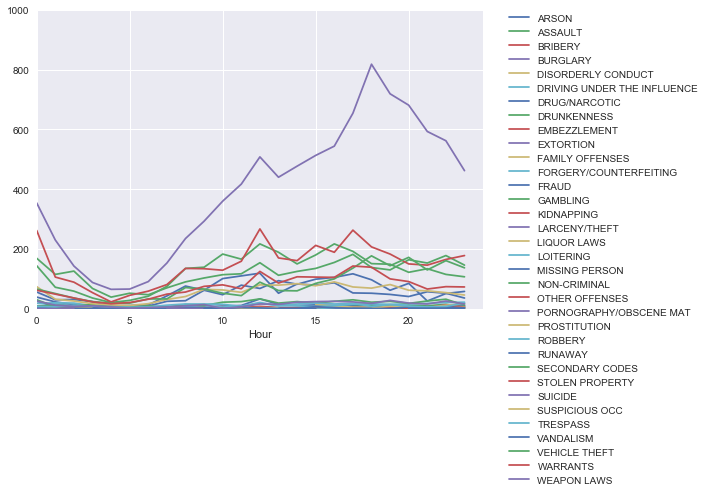

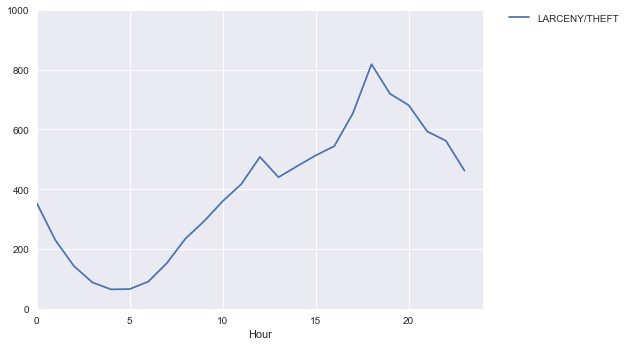

In [37]:
hm_data.plot(kind='line')
#plt.subplots(figsize=(20,9))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axis([0, 24, 0, 1000])
plt.show()

hm_data['LARCENY/THEFT'].plot(kind='line')
#plt.subplots(figsize=(20,9))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axis([0, 24, 0, 1000])
plt.show()

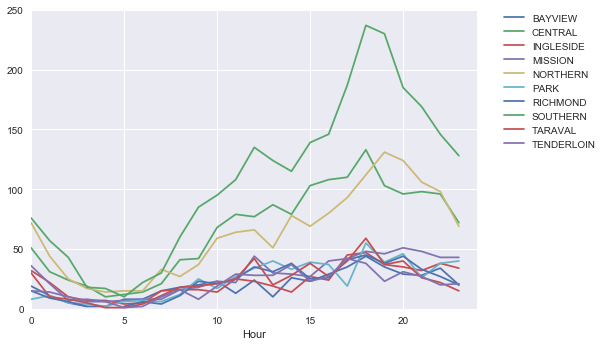

In [41]:
hm_data = sfc[sfc['Category'] == 'LARCENY/THEFT'].pivot_table(values='cnt', index=['Hour'],columns='PdDistrict', aggfunc=sum)
hm_data.plot(kind='line')
#plt.subplots(figsize=(20,9))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axis([0, 24, 0, 250])
plt.show()

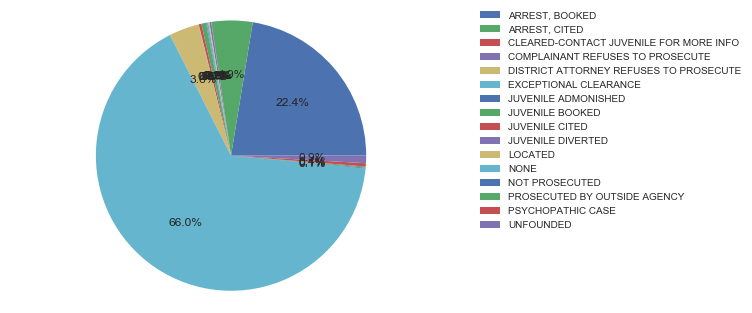

In [64]:
res_data = sfc.groupby('Resolution',as_index=False)['cnt'].sum()
plt.pie(res_data['cnt'], autopct='%1.1f%%')
plt.axis('equal')
plt.legend(res_data['Resolution'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

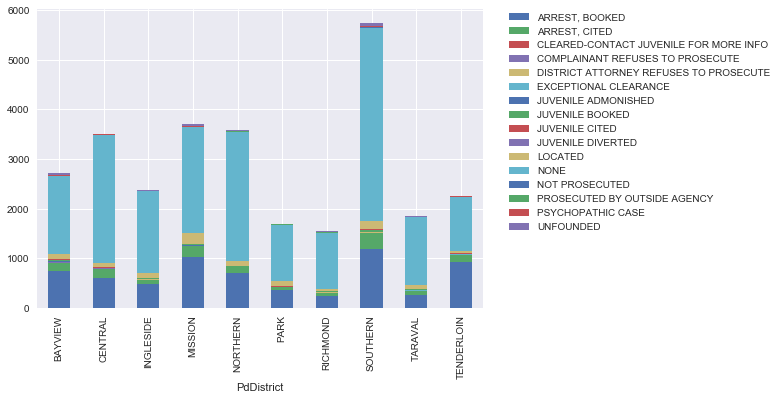

In [83]:
res_data = sfc.pivot_table(values='cnt', index=['PdDistrict'],columns='Resolution', aggfunc=sum)
res_data.plot.bar(stacked=True)
#plt.axis('equal')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [85]:
res_data.head()
res_data.sum(axis=0)

Resolution
ARREST, BOOKED                             6502.0
ARREST, CITED                              1419.0
CLEARED-CONTACT JUVENILE FOR MORE INFO        8.0
COMPLAINANT REFUSES TO PROSECUTE             66.0
DISTRICT ATTORNEY REFUSES TO PROSECUTE       33.0
EXCEPTIONAL CLEARANCE                        56.0
JUVENILE ADMONISHED                          24.0
JUVENILE BOOKED                             163.0
JUVENILE CITED                               91.0
JUVENILE DIVERTED                             8.0
LOCATED                                    1042.0
NONE                                      19139.0
NOT PROSECUTED                               28.0
PROSECUTED BY OUTSIDE AGENCY                 40.0
PSYCHOPATHIC CASE                           114.0
UNFOUNDED                                   260.0
dtype: float64

In [43]:
hm_data = sfc.pivot_table(values='cnt', index=['Category'],columns='Resolution', aggfunc=sum)
hm_data.head()

Resolution,"ARREST, BOOKED","ARREST, CITED",CLEARED-CONTACT JUVENILE FOR MORE INFO,COMPLAINANT REFUSES TO PROSECUTE,DISTRICT ATTORNEY REFUSES TO PROSECUTE,EXCEPTIONAL CLEARANCE,JUVENILE ADMONISHED,JUVENILE BOOKED,JUVENILE CITED,JUVENILE DIVERTED,LOCATED,NONE,NOT PROSECUTED,PROSECUTED BY OUTSIDE AGENCY,PSYCHOPATHIC CASE,UNFOUNDED
Category,,,,,,,,,,,,,,,,
ARSON,18.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN
ASSAULT,898.0,171.0,NaN,29.0,6.0,10.0,2.0,24.0,14.0,NaN,NaN,1707.0,NaN,2.0,13.0,6.0
BRIBERY,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BURGLARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN
DISORDERLY CONDUCT,12.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,1.0,NaN


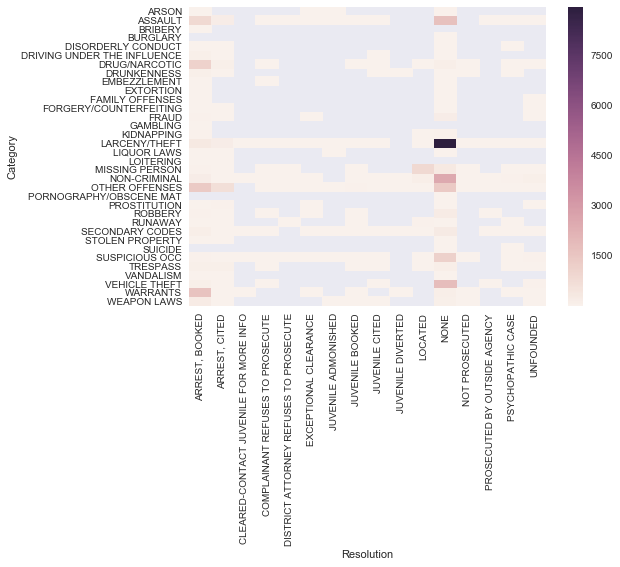

In [53]:
ax=sns.heatmap(hm_data)
plt.show()

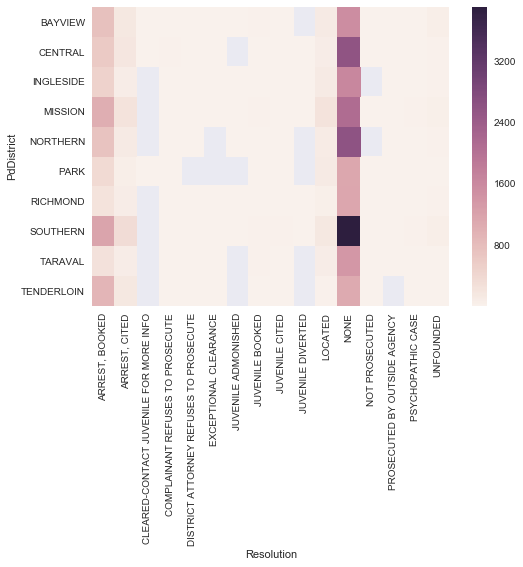

In [42]:
hm_data = sfc.pivot_table(values='cnt', index=['PdDistrict'],columns='Resolution', aggfunc=sum)
ax=sns.heatmap(hm_data)
plt.show()